In [45]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [46]:
df = pd.read_csv('alzheimers_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [48]:
# Drop kolom PatientID sebab tak guna
df = df.drop(columns=['PatientID'])

In [49]:
df.isna().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

In [51]:
print(df['DoctorInCharge'].unique())

['XXXConfid']


In [52]:
df = df.drop(columns=['DoctorInCharge'])

In [53]:
# select categorical columns based on uniqueness less than 10
categorical_cols = df.nunique()
categorical_cols = categorical_cols[categorical_cols < 10].index.tolist()
print(categorical_cols)

['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']


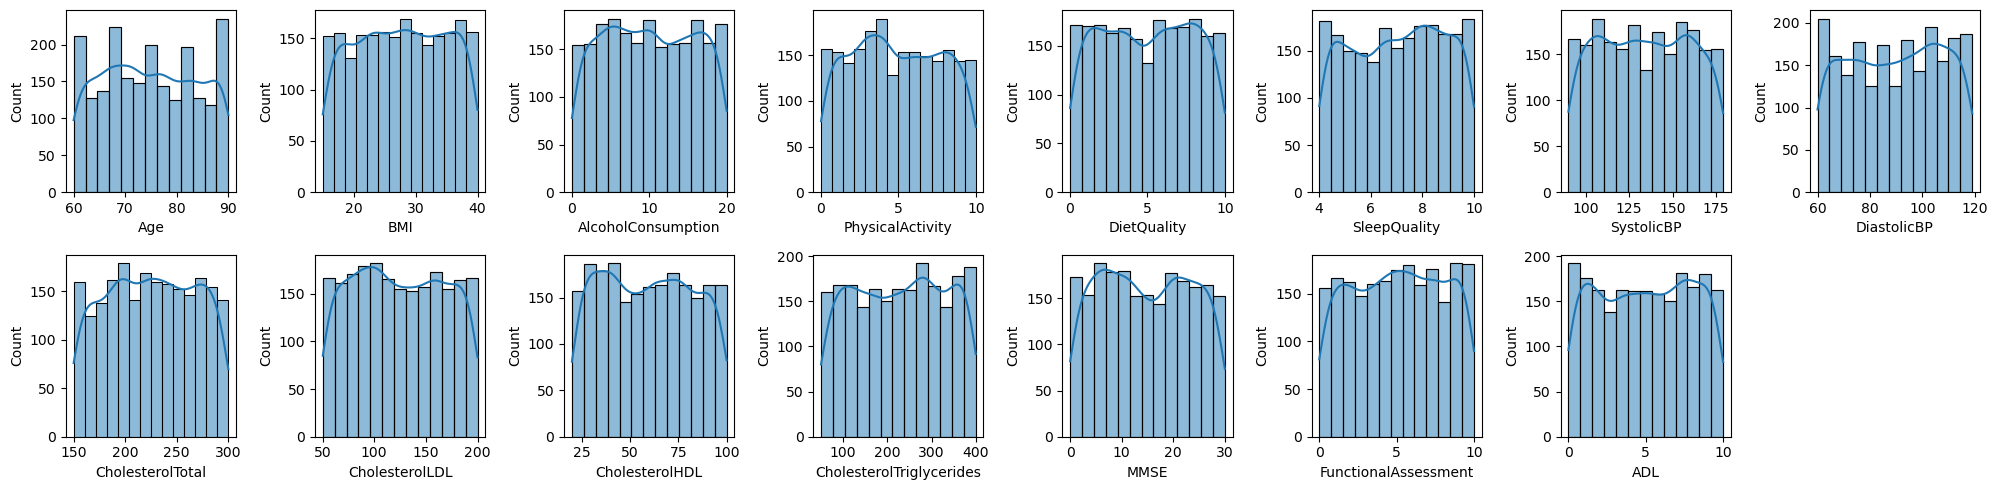

In [54]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols[~numerical_cols.isin(categorical_cols)]
num_cols = len(numerical_cols)
rows = (num_cols // 8) + (1 if num_cols % 8 != 0 else 0)
fig, ax = plt.subplots(rows, 8, figsize=(20, 5))

ax = ax.flatten()

for i in range(num_cols):
    sns.histplot(data=df, x=numerical_cols[i], ax=ax[i], kde=True)

for j in range(num_cols, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


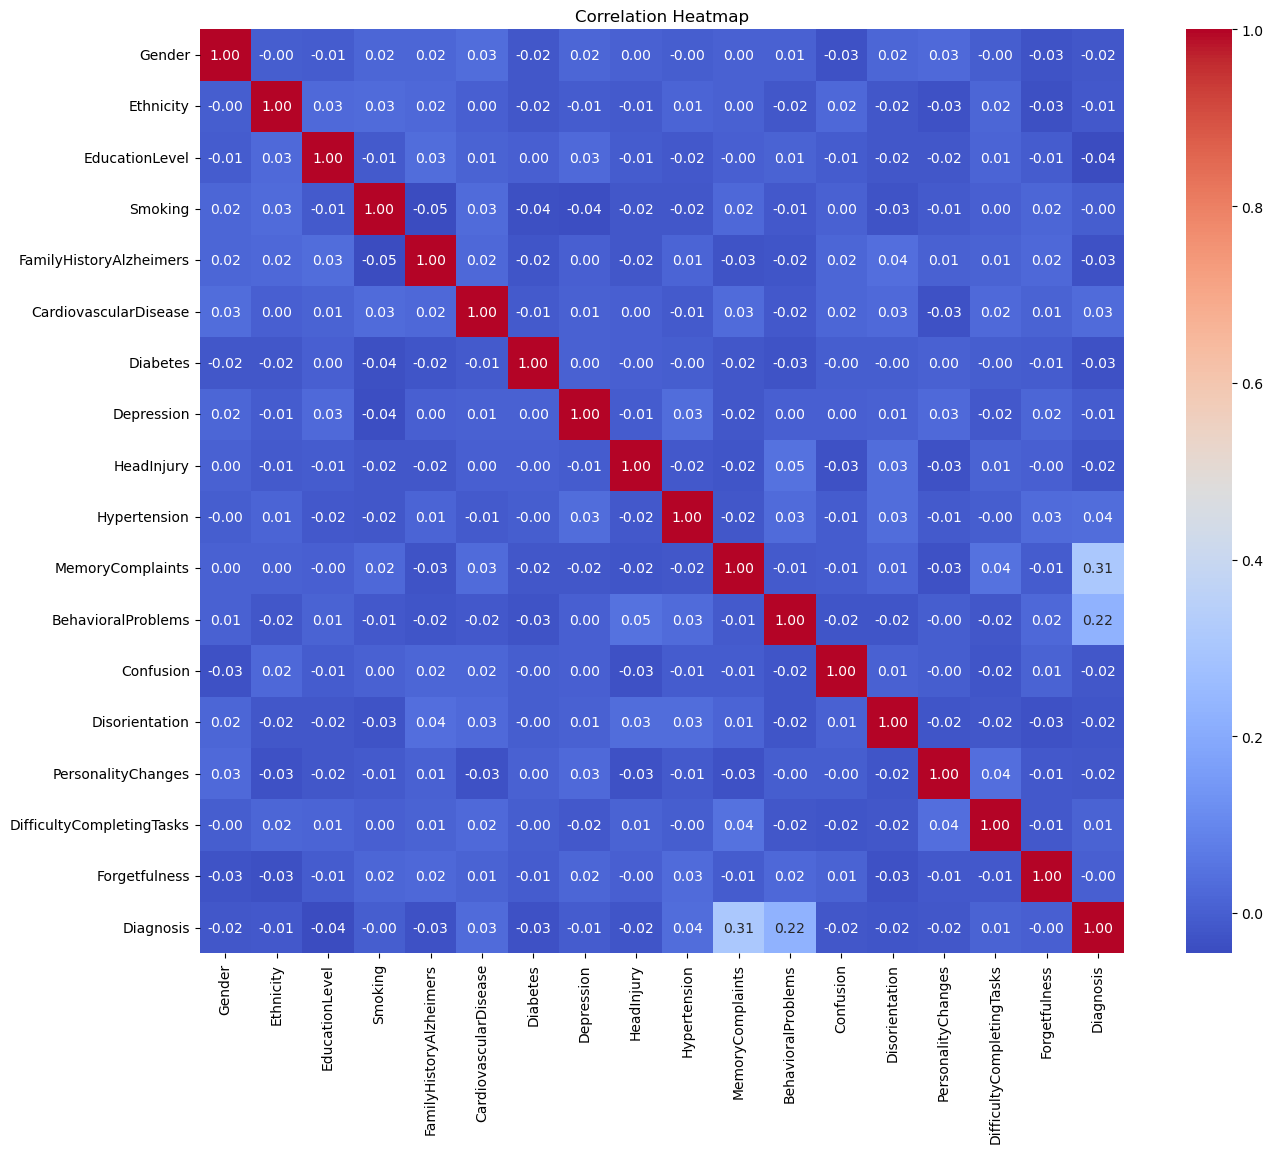

In [55]:
corr = df[categorical_cols].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')

plt.show()

In [56]:
# train test split
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# Select top 10 features based on mutual information
num_selected_features = 10
selector = SelectKBest(score_func=lambda X, y: mutual_info_classif(X, y, random_state=42), k=num_selected_features)
selector.fit(X_train, y_train)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())
print("Dropped Features:", X.columns[~selector.get_support()].tolist())

Selected Features: ['Age', 'AlcoholConsumption', 'FamilyHistoryAlzheimers', 'Hypertension', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Disorientation']
Dropped Features: ['Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'Confusion', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']


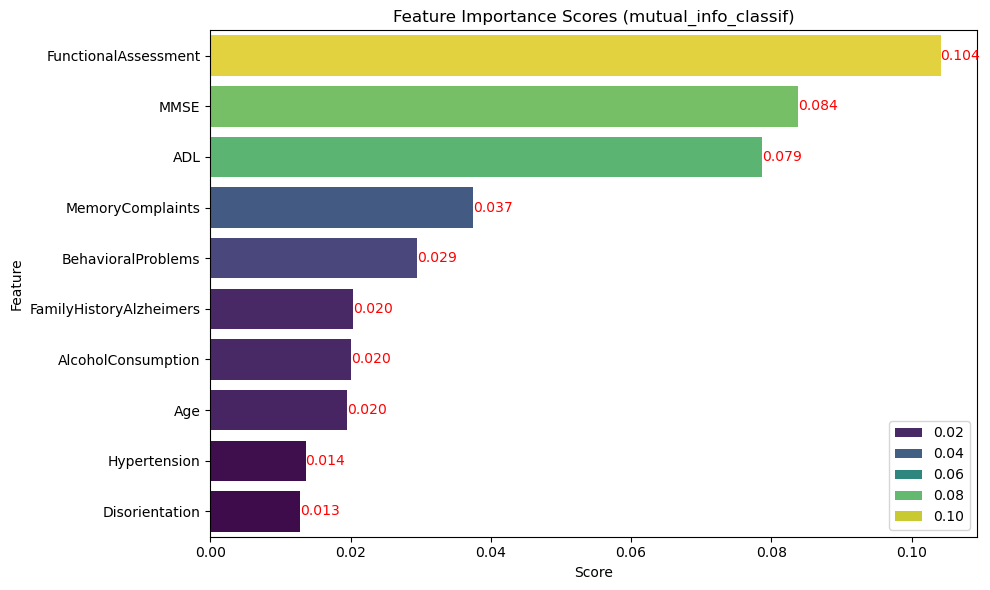

In [58]:
scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)[:num_selected_features]
plt.figure(figsize=(10, 6))
sns.barplot(x=scores.values, y=scores.index, palette="viridis", hue=scores.values)
for i, v in enumerate(scores.values):
    plt.text(v, i, f"{v:.3f}", color='red', va='center', fontsize=10)
plt.title("Feature Importance Scores (mutual_info_classif)")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [59]:
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[selected_features])
X_test = scaler.transform(X_test[selected_features])
X_train = pd.DataFrame(X_train, columns=selected_features)
X_test = pd.DataFrame(X_test, columns=selected_features)

In [60]:
# cek data imbalance
print(pd.Series(y_train).value_counts())

Diagnosis
0    1112
1     607
Name: count, dtype: int64


In [61]:
X_train.head()

,Age,AlcoholConsumption,FamilyHistoryAlzheimers,Hypertension,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Disorientation
0,1.328523,1.136669,-0.576679,-0.424054,1.234392,-0.686652,-0.509255,-0.430717,0.567727,-0.434507
1,-0.547367,-1.492106,1.734068,-0.424054,-0.746324,0.189349,-0.509255,2.321709,-0.368604,-0.434507
2,0.776791,1.099593,-0.576679,-0.424054,0.729927,-0.486998,-0.509255,-0.430717,-0.324772,-0.434507
3,0.114712,0.317867,-0.576679,-0.424054,1.606083,-0.145887,-0.509255,-0.430717,1.488066,-0.434507
4,-1.540486,-1.334000,-0.576679,-0.424054,-1.402005,1.568230,1.963653,-0.430717,1.305910,2.301457


In [62]:
saved_accuracy = {
    'RandomForest': 0,
    'GradientBoosting': 0,
    'XGBoost': 0,
    'LogisticRegression': 0,
    'NaiveBayes': 0,
    'SVC': 0,
    'CatBoost': 0,
}

### Random Forest Classifier

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Random Forest:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy:  0.9558139534883721
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       277
           1       0.97      0.91      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430



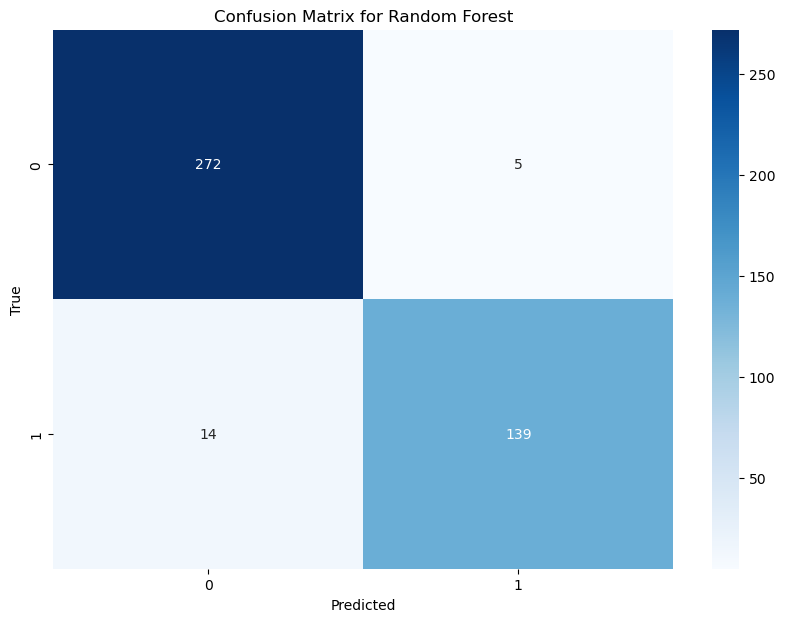

In [63]:
# set params for random forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters for Random Forest: ", grid_search.best_params_)

# confusion matrix and classification report

y_pred = grid_search.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# save accuracy
saved_accuracy['RandomForest'] = accuracy_score(y_test, y_pred)

### SVM

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters for SVM:  {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy:  0.8767441860465116
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       277
           1       0.83      0.82      0.83       153

    accuracy                           0.88       430
   macro avg       0.87      0.86      0.86       430
weighted avg       0.88      0.88      0.88       430



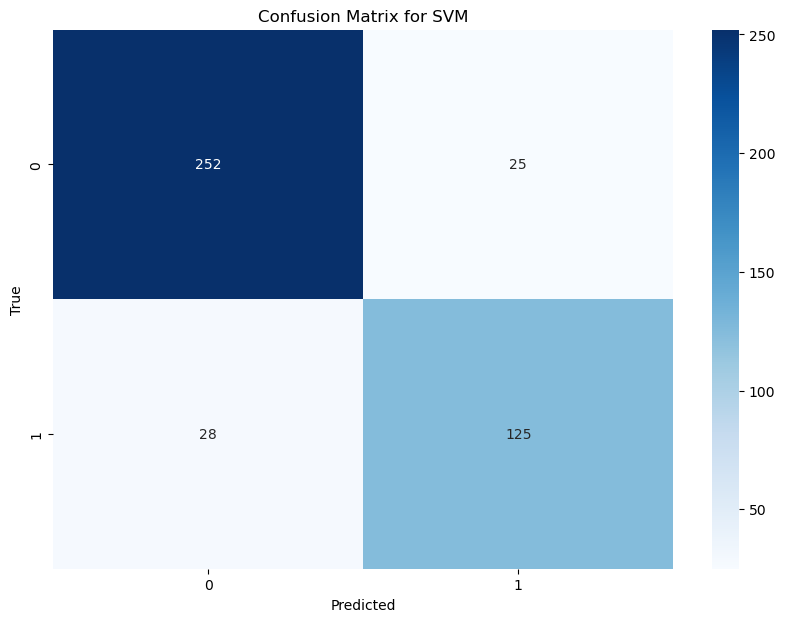

In [64]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}
svm = SVC(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters for SVM: ", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

saved_accuracy['SVC'] = accuracy_score(y_test, y_pred)

### Logistic Regression

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for Logistic Regression:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Accuracy:  0.8372093023255814
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       277
           1       0.75      0.82      0.78       153

    accuracy                           0.84       430
   macro avg       0.82      0.83      0.83       430
weighted avg       0.84      0.84      0.84       430



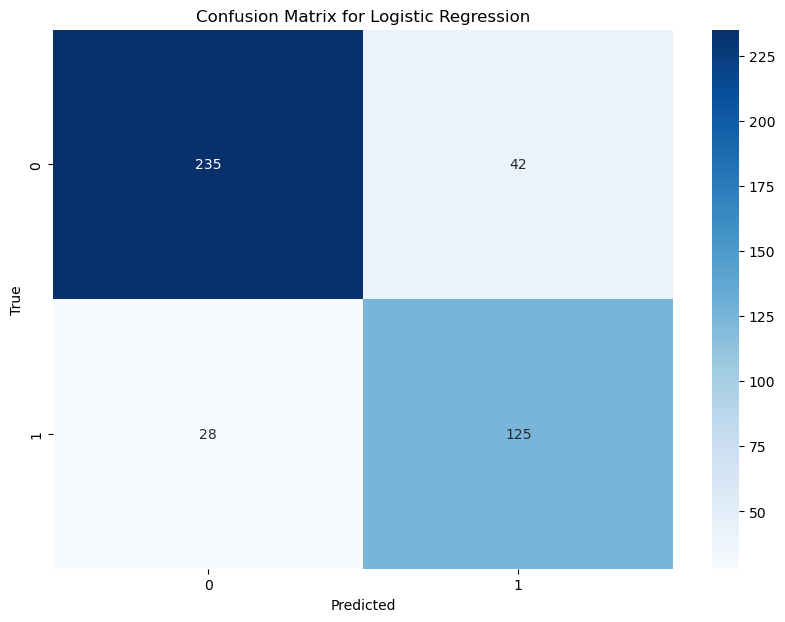

In [65]:
# gridsearch for logistic regression
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}
log_reg = LogisticRegression(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
print("Best parameters for Logistic Regression: ", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
saved_accuracy['LogisticRegression'] = accuracy_score(y_test, y_pred)

### XG Boost

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for XGBoost:  {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Accuracy:  0.958139534883721
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       277
           1       0.96      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430



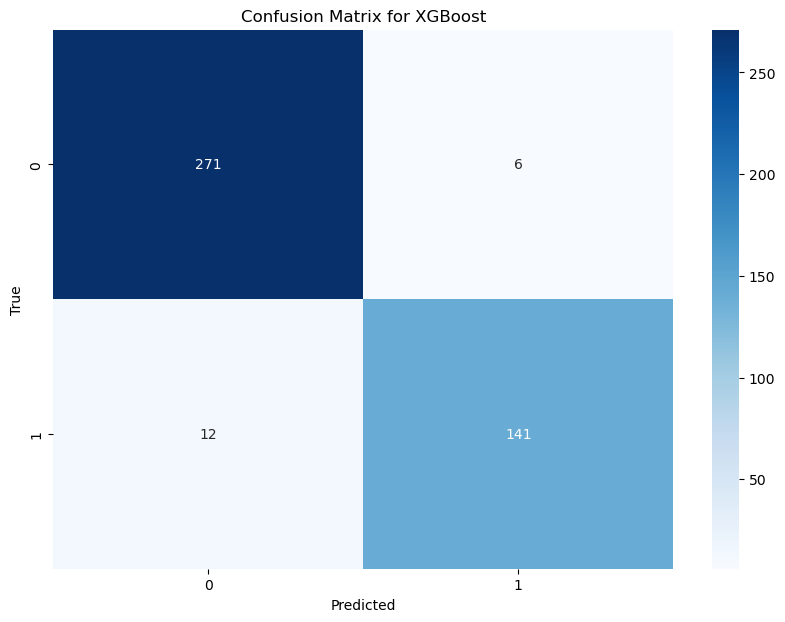

In [66]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb = XGBClassifier(random_state=42, scale_pos_weight=1)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters for XGBoost: ", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
saved_accuracy['XGBoost'] = accuracy_score(y_test, y_pred)

### Naive Bayes

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters for Naive Bayes:  {'var_smoothing': 1e-09}
Accuracy:  0.8232558139534883
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       277
           1       0.78      0.70      0.74       153

    accuracy                           0.82       430
   macro avg       0.81      0.80      0.80       430
weighted avg       0.82      0.82      0.82       430



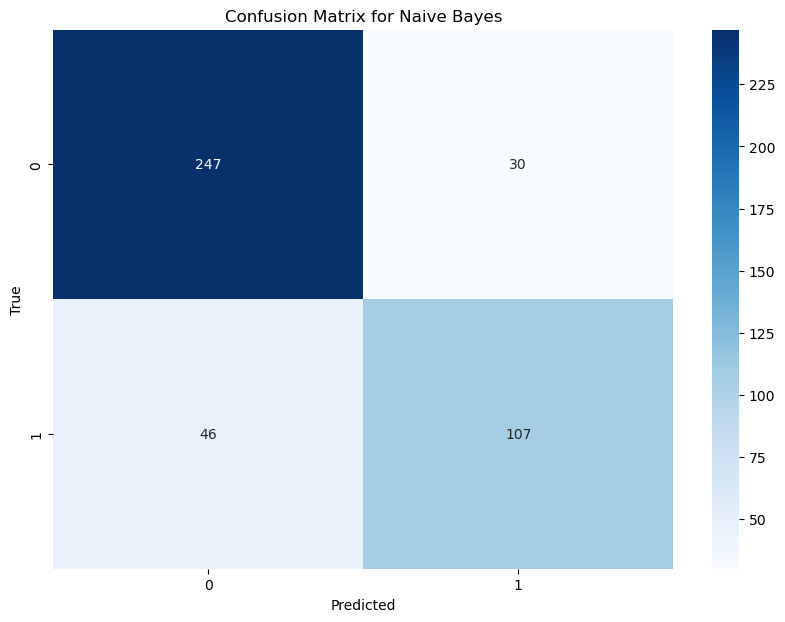

In [67]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

gnb = GaussianNB()
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters for Naive Bayes: ", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
saved_accuracy['NaiveBayes'] = accuracy_score(y_test, y_pred)

### Cat Boost

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters for CatBoost:  {'depth': 5, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.2, 'subsample': 1.0}
Accuracy:  0.9558139534883721
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       277
           1       0.96      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430



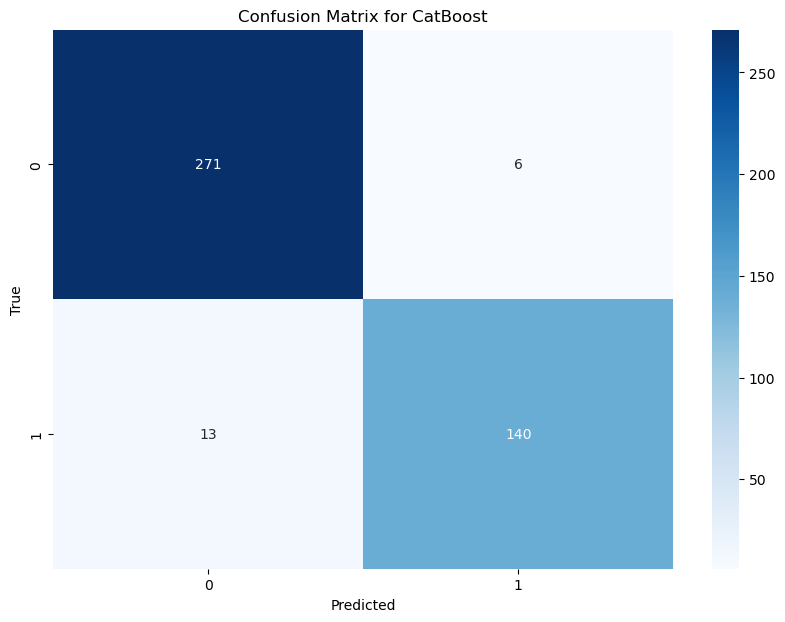

In [68]:
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5],
    'subsample': [0.8, 1.0]
}

catboost = CatBoostClassifier(random_state=42, verbose=0)
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters for CatBoost: ", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for CatBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
saved_accuracy['CatBoost'] = accuracy_score(y_test, y_pred)

### Gradient Boost

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for Gradient Boosting:  {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy:  0.958139534883721
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       277
           1       0.97      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430



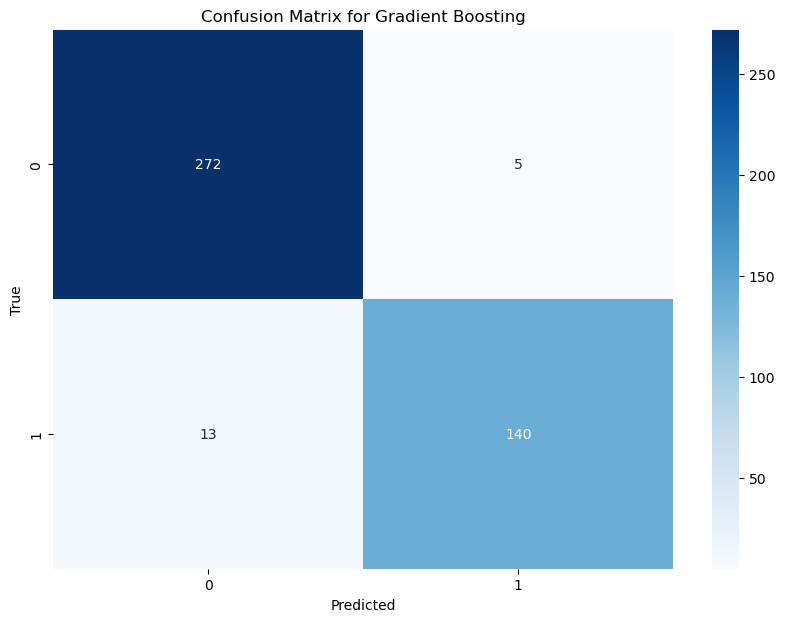

In [69]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters for Gradient Boosting: ", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
saved_accuracy['GradientBoosting'] = accuracy_score(y_test, y_pred)

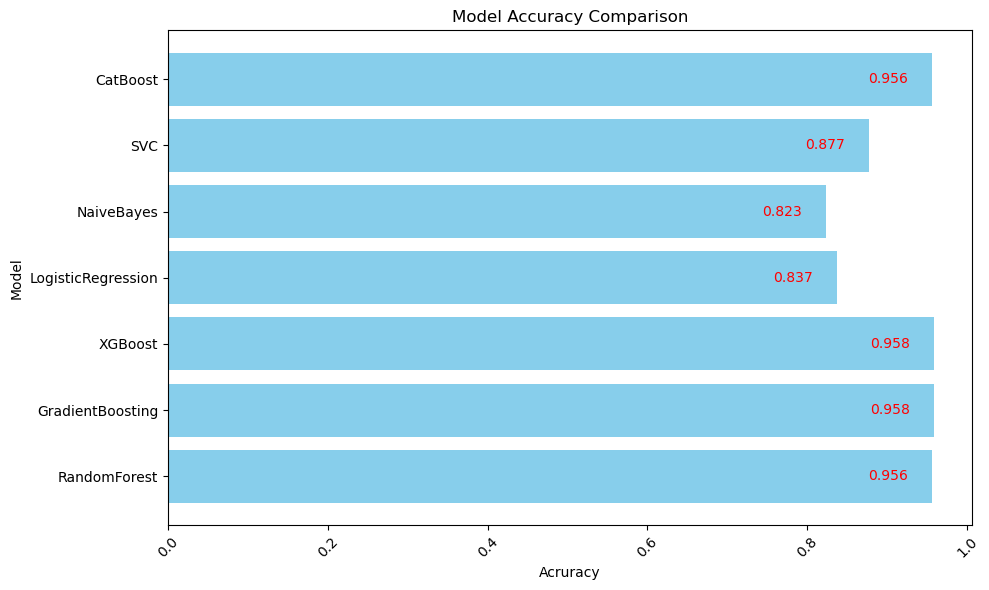

Best Model: GradientBoosting with accuracy: 0.958


In [70]:
plt.figure(figsize=(10, 6))
plt.barh(list(saved_accuracy.keys()), list(saved_accuracy.values()), color='skyblue')
for i, v in enumerate(saved_accuracy.values()):
    plt.text(v - 0.08, i, f"{v:.3f}", color='red', va='center', fontsize=10)
plt.xticks(rotation=90)
plt.title("Model Accuracy Comparison")
plt.xlabel("Acruracy")
plt.ylabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

best_model_name = max(saved_accuracy, key=saved_accuracy.get)
best_model_accuracy = saved_accuracy[best_model_name]
print(f"Best Model: {best_model_name} with accuracy: {best_model_accuracy:.3f}")

In [71]:
import joblib
joblib.dump(grid_search, "model.pkl")

['model.pkl']